In [1]:
# Imports
import sys
import tensorflow as tf

import cv2
import pandas as pd
import numpy as np

# import plotly.graph_objs as go
# from plotly.offline import iplot
from matplotlib import pyplot as plt

/Users/daisy./Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [15]:
# Prepping data
data_dir = '/Users/daisy./Documents/data'

data = tf.keras.utils.image_dataset_from_directory(data_dir)

data = data.map(lambda x, y: (x/255, y))

train_size = int(len(data)* .7)
val_size = int(len(data)* .2)
test_size = int(len(data)* .1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Found 512 files belonging to 2 classes.


In [16]:
# Model Architecture
from functools import partial

tf.random.set_seed(42) 
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[256, 256, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

In [17]:
# Compile model
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    67,108,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,348,225 (256.91 MB)

 Trainable params: 67,348,225 (256.91 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
logdir = '/Users/daisy./Documents/info 492/logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 116s 11s/step - accuracy: 0.4662 - loss: 12.4520 - val_accuracy: 0.5938 - val_loss: 0.6835
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 117s 11s/step - accuracy: 0.4825 - loss: 0.7016 - val_accuracy: 0.5208 - val_loss: 0.6941
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 114s 10s/step - accuracy: 0.5124 - loss: 0.6933 - val_accuracy: 0.5312 - val_loss: 0.6933
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 111s 10s/step - accuracy: 0.5028 - loss: 0.6929 - val_accuracy: 0.5625 - val_loss: 0.6928
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 112s 10s/step - accuracy: 0.4680 - loss: 0.6934 - val_accuracy: 0.5625 - val_loss: 0.6917
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 111s 10s/step - accuracy: 0.5147 - loss: 0.6942 - val_accuracy: 0.5417 - val_loss: 0.6929
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 116s 10s/step - accuracy: 0.4878 - loss: 0.6938 - val_accuracy: 0.5521 - val_loss: 0.6928
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 113s 10s/step - accuracy: 0.4941 - loss: 0.6931 - val_accuracy: 0

In [19]:
score = model.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3750 - loss: 0.6974


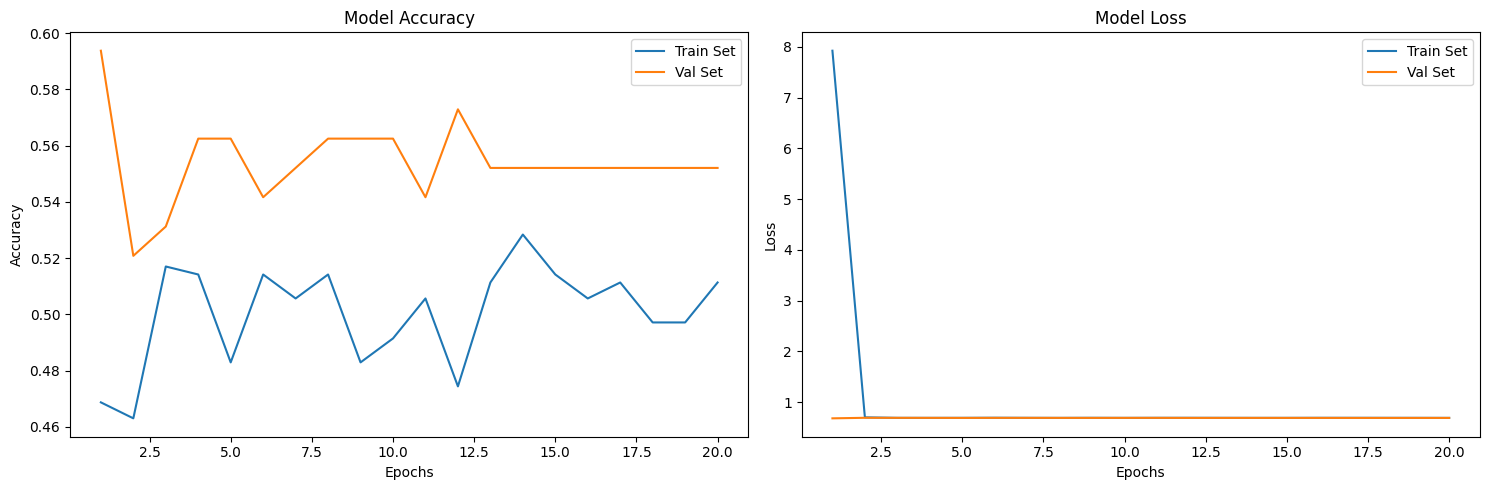

In [20]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs_range = range(1, len(hist.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()